Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   4

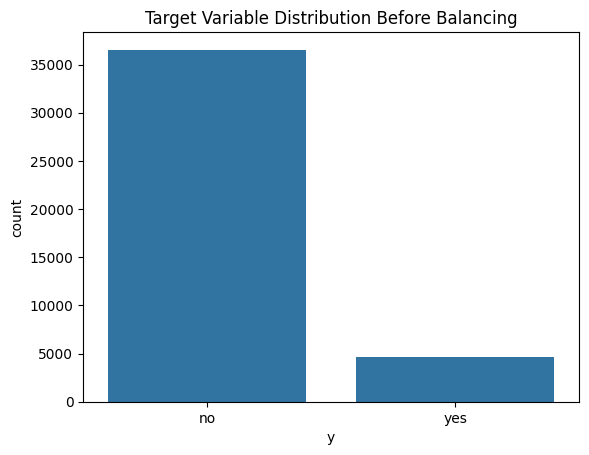


Missing Values:
 Series([], dtype: int64)

Unique Values per Column:

age: 78 unique values
job: 12 unique values
marital: 4 unique values
education: 8 unique values
default: 3 unique values
housing: 3 unique values
loan: 3 unique values
contact: 2 unique values
month: 10 unique values
day_of_week: 5 unique values
duration: 1544 unique values
campaign: 42 unique values
pdays: 27 unique values
previous: 8 unique values
poutcome: 3 unique values
emp.var.rate: 10 unique values
cons.price.idx: 26 unique values
cons.conf.idx: 26 unique values
euribor3m: 316 unique values
nr.employed: 11 unique values
y: 2 unique values

Categorical Features: ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome']

Unique values in job: ['housemaid' 'services' 'admin.' 'blue-collar' 'technician' 'retired'
 'management' 'unemployed' 'self-employed' 'unknown' 'entrepreneur'
 'student']

Unique values in marital: ['married' 'single' 'divorced' 'unknown']

Un

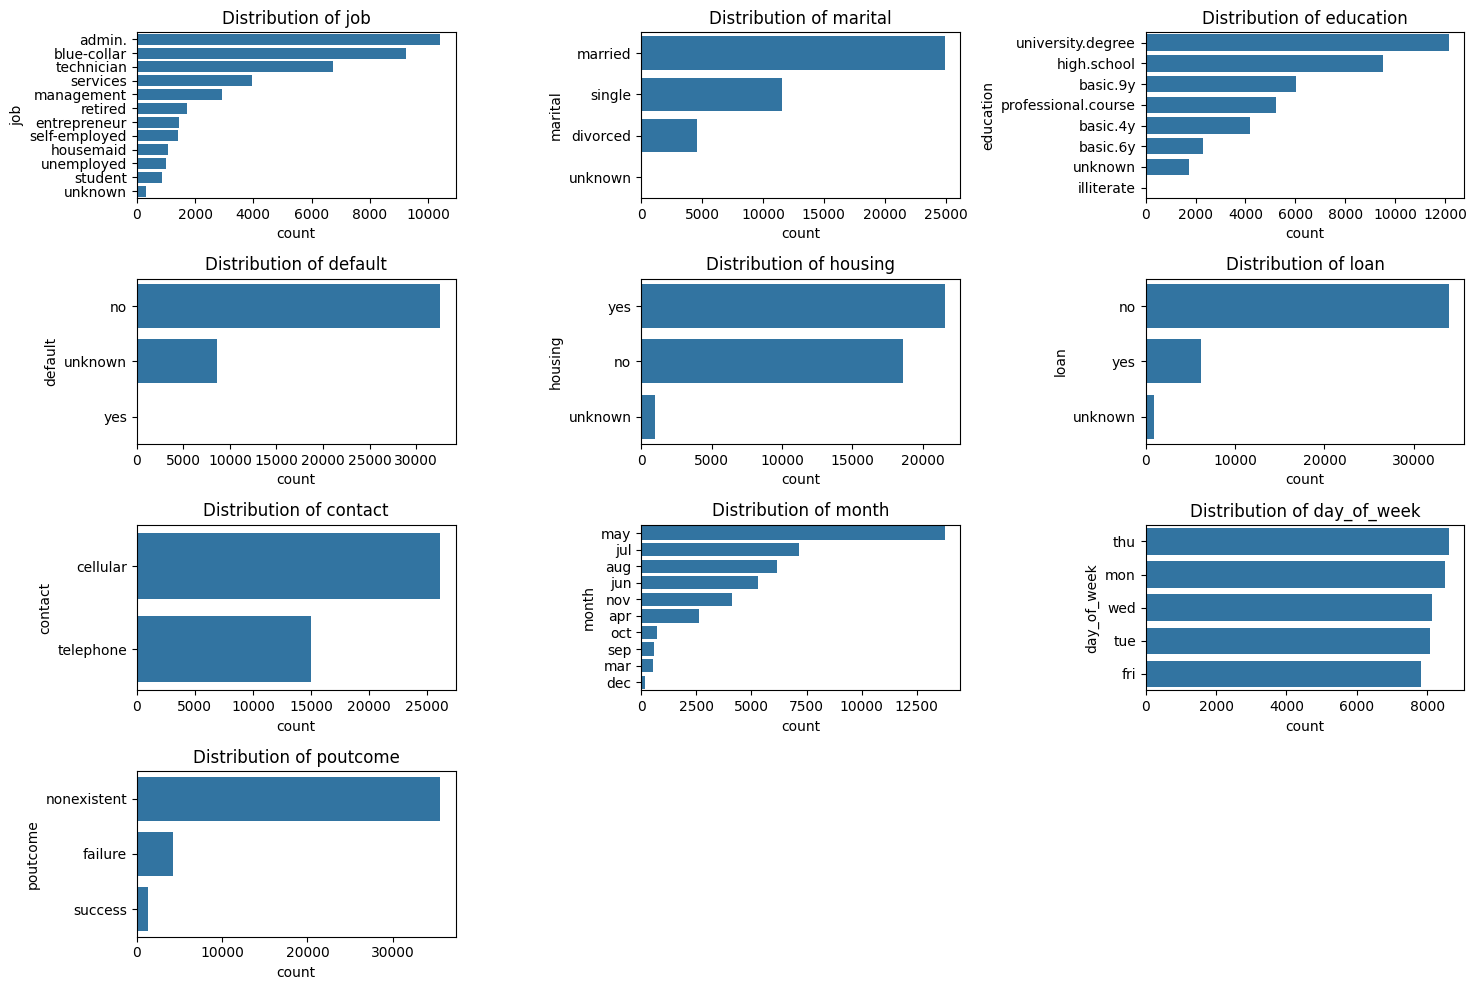

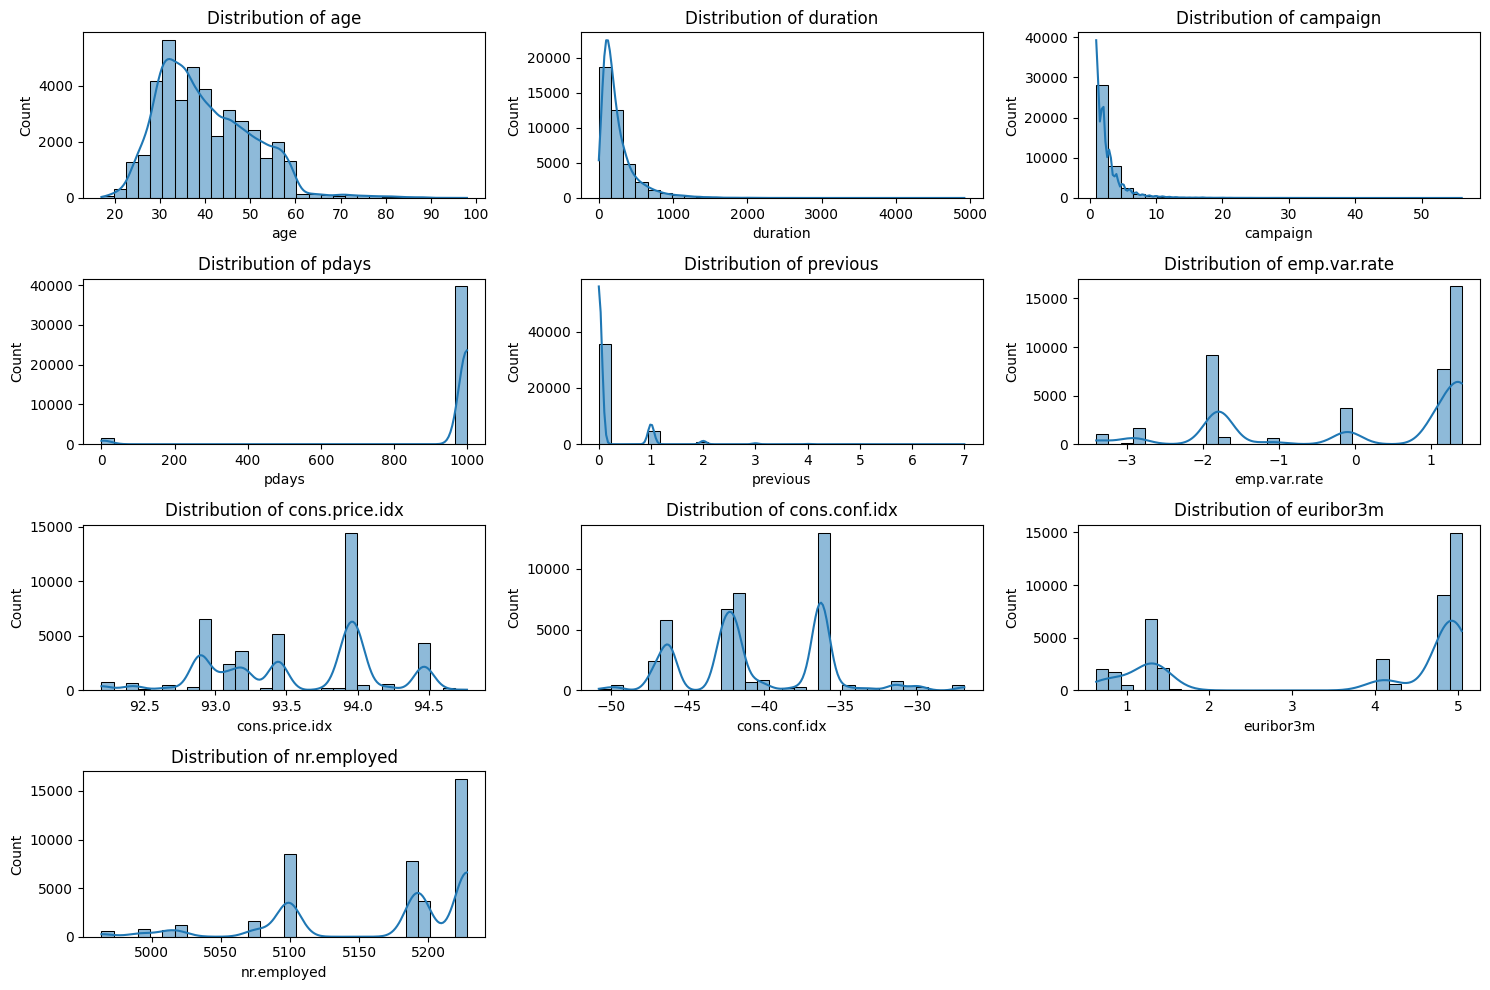

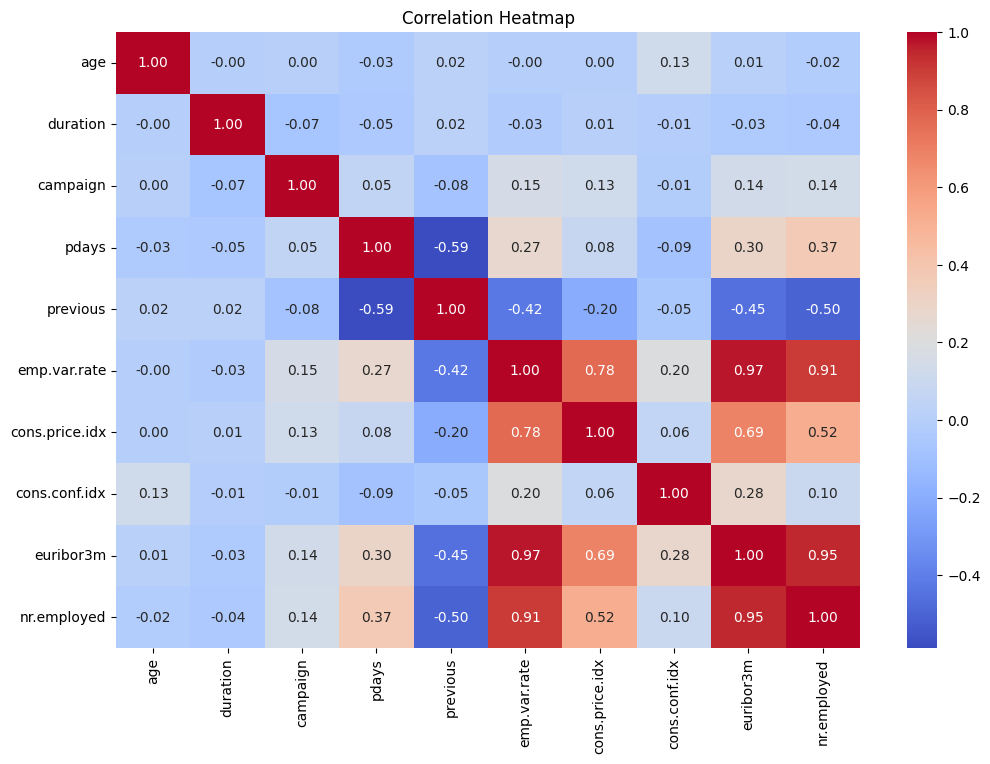

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, roc_curve
from sklearn.model_selection import GridSearchCV
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from imblearn.over_sampling import SMOTE

# Load dataset
df = pd.read_csv("/content/bank-additional-full.csv", sep=';')

# Initial dataset exploration
print("Dataset Info:")
df.info()
print("\nDataset Shape:", df.shape)
print("\nFirst 5 Rows:\n", df.head())

# Checking class distribution for target variable
y_distribution = df['y'].value_counts()
print("\nTarget Variable Distribution:\n", y_distribution)

# Plot target variable distribution
sns.countplot(x='y', data=df)
plt.title("Target Variable Distribution Before Balancing")
plt.show()

# Check for missing values
missing_values = df.isnull().sum()
print("\nMissing Values:\n", missing_values[missing_values > 0])

# Check for unique values in each column
print("\nUnique Values per Column:\n")
for col in df.columns:
    print(f"{col}: {df[col].nunique()} unique values")

# Exploring categorical features
categorical_features = df.select_dtypes(include=['object']).columns.tolist()
categorical_features.remove('y')  # Exclude target variable

print("\nCategorical Features:", categorical_features)
for col in categorical_features:
    print(f"\nUnique values in {col}: {df[col].unique()}")

# Exploring numerical features
numerical_features = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
print("\nNumerical Features:", numerical_features)
print(df[numerical_features].describe())

# Visualize categorical feature distribution
plt.figure(figsize=(15, 10))
num_plots = len(categorical_features)
for i, col in enumerate(categorical_features):
    plt.subplot((num_plots + 2) // 3, 3, i + 1)  # Adjust grid size dynamically
    sns.countplot(data=df, y=col, order=df[col].value_counts().index)
    plt.title(f"Distribution of {col}")
plt.tight_layout()
plt.show()

# Visualize numerical feature distribution
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_features):
    plt.subplot((len(numerical_features) + 2) // 3, 3, i + 1)  # Adjust grid size dynamically
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f"Distribution of {col}")
plt.tight_layout()
plt.show()

# Correlation heatmap for numerical features
plt.figure(figsize=(12, 8))
correlation_matrix = df[numerical_features].corr()
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

In [2]:
# Feature Engineering
# Encode categorical variables using one-hot encoding or label encoding
encoded_df = df.copy()
label_encoder = LabelEncoder()
encoded_df['y'] = label_encoder.fit_transform(encoded_df['y'])  # Encode target variable

# One-hot encode categorical features
encoded_df = pd.get_dummies(encoded_df, columns=categorical_features, drop_first=True)

# Scale numerical features
scaler = StandardScaler()
encoded_df[numerical_features] = scaler.fit_transform(encoded_df[numerical_features])

print("\nEncoded and Scaled Dataset Info:")
encoded_df.info()


Encoded and Scaled Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 54 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   age                            41188 non-null  float64
 1   duration                       41188 non-null  float64
 2   campaign                       41188 non-null  float64
 3   pdays                          41188 non-null  float64
 4   previous                       41188 non-null  float64
 5   emp.var.rate                   41188 non-null  float64
 6   cons.price.idx                 41188 non-null  float64
 7   cons.conf.idx                  41188 non-null  float64
 8   euribor3m                      41188 non-null  float64
 9   nr.employed                    41188 non-null  float64
 10  y                              41188 non-null  int64  
 11  job_blue-collar                41188 non-null  bool   
 12  job_entrepre


Training Set Shape: (32950, 53) (32950,)
Testing Set Shape: (8238, 53) (8238,)


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The SMOTE or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(



Resampled Training Set Shape: (58490, 53) (58490,)


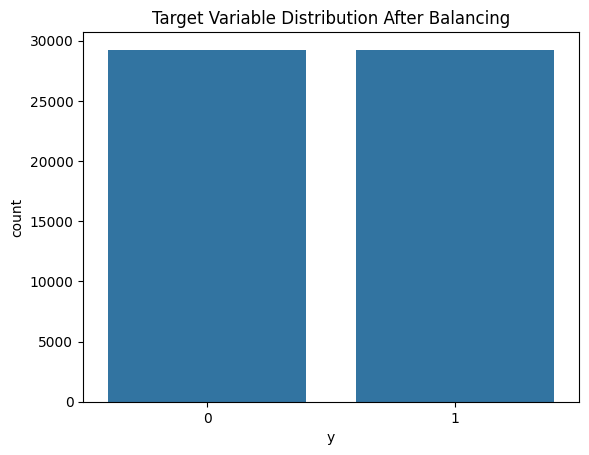

In [3]:
# Splitting dataset into training and testing sets
X = encoded_df.drop(columns=['y'])
y = encoded_df['y']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("\nTraining Set Shape:", X_train.shape, y_train.shape)
print("Testing Set Shape:", X_test.shape, y_test.shape)

# Address class imbalance using SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)
print("\nResampled Training Set Shape:", X_train_resampled.shape, y_train_resampled.shape)

# Plot target variable distribution after SMOTE
sns.countplot(x=y_train_resampled)
plt.title("Target Variable Distribution After Balancing")
plt.show()

In [7]:
# Random Forest Model with Hyperparameter Tuning
rf_param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30],
    'min_samples_split': [10, 15],
    'min_samples_leaf': [4, 6]
}
rf_model = RandomForestClassifier(random_state=42)
rf_grid_search = GridSearchCV(estimator=rf_model, param_grid=rf_param_grid, cv=3, scoring='f1', verbose=2)
rf_grid_search.fit(X_train_resampled, y_train_resampled)
rf_best_model = rf_grid_search.best_estimator_
y_pred_rf = rf_best_model.predict(X_test)

# Random Forest Evaluation
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)
roc_auc_rf = roc_auc_score(y_test, rf_best_model.predict_proba(X_test)[:, 1])

print("\nRandom Forest Performance:")
print(f"Accuracy: {accuracy_rf:.4f}")
print(f"Precision: {precision_rf:.4f}")
print(f"Recall: {recall_rf:.4f}")
print(f"F1 Score: {f1_rf:.4f}")
print(f"ROC-AUC: {roc_auc_rf:.4f}")

Fitting 3 folds for each of 36 candidates, totalling 108 fits
[CV] END max_depth=10, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   5.0s
[CV] END max_depth=10, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   4.2s
[CV] END max_depth=10, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   3.8s
[CV] END max_depth=10, min_samples_leaf=4, min_samples_split=10, n_estimators=200; total time=   9.0s
[CV] END max_depth=10, min_samples_leaf=4, min_samples_split=10, n_estimators=200; total time=   7.5s
[CV] END max_depth=10, min_samples_leaf=4, min_samples_split=10, n_estimators=200; total time=   8.8s
[CV] END max_depth=10, min_samples_leaf=4, min_samples_split=10, n_estimators=300; total time=  12.7s
[CV] END max_depth=10, min_samples_leaf=4, min_samples_split=10, n_estimators=300; total time=  12.3s
[CV] END max_depth=10, min_samples_leaf=4, min_samples_split=10, n_estimators=300; total time=  12.6s
[CV] END max_depth=1

In [6]:
# Neural Network Model with Adjusted Architecture
nn_model = Sequential([
    Dense(256, activation='relu', input_dim=X_train_resampled.shape[1]),
    Dropout(0.4),
    Dense(128, activation='relu'),
    Dropout(0.4),
    Dense(1, activation='sigmoid')
])

nn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
nn_history = nn_model.fit(X_train_resampled, y_train_resampled, epochs=50, batch_size=64, validation_split=0.2, verbose=1)

# Neural Network Evaluation
y_pred_nn = (nn_model.predict(X_test) > 0.5).astype('int32')
accuracy_nn = accuracy_score(y_test, y_pred_nn)
precision_nn = precision_score(y_test, y_pred_nn)
recall_nn = recall_score(y_test, y_pred_nn)
f1_nn = f1_score(y_test, y_pred_nn)
roc_auc_nn = roc_auc_score(y_test, nn_model.predict(X_test))

print("\nNeural Network Performance:")
print(f"Accuracy: {accuracy_nn:.4f}")
print(f"Precision: {precision_nn:.4f}")
print(f"Recall: {recall_nn:.4f}")
print(f"F1 Score: {f1_nn:.4f}")
print(f"ROC-AUC: {roc_auc_nn:.4f}")

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


732/732 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.8487 - loss: 0.3396 - val_accuracy: 0.9082 - val_loss: 0.3106
Epoch 2/50
732/732 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.8933 - loss: 0.2505 - val_accuracy: 0.9561 - val_loss: 0.1816
Epoch 3/50
732/732 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9025 - loss: 0.2275 - val_accuracy: 0.9487 - val_loss: 0.1932
Epoch 4/50
732/732 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9072 - loss: 0.2117 - val_accuracy: 0.9307 - val_loss: 0.2490
Epoch 5/50
732/732 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9141 - loss: 0.2025 - val_accuracy: 0.9456 - val_loss: 0.2014
Epoch 6/50
732/732 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9163 - loss: 0.1975 - val_accuracy: 0.9573 - val_loss: 0.1684
Epoch 7/50
732/732 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9165 - loss: 0.1939 - val_accuracy: 0.9599 - val_loss: 0.1537
Epoch 8/50
732/732 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9149 - loss: 0.1936 - val_accuracy: 0.9613 - val_

In [11]:
import pandas as pd

# Create a dictionary to store the model metrics
model_metrics = {
    "Metric": ["Accuracy", "Precision", "Recall", "F1 Score", "ROC-AUC"],
    "Random Forest": [accuracy_rf, precision_rf, recall_rf, f1_rf, roc_auc_rf],
    "Neural Network": [accuracy_nn, precision_nn, recall_nn, f1_nn, roc_auc_nn],
}

# Create a DataFrame for better formatting
comparison_df = pd.DataFrame(model_metrics)

# Print the comparison table
print("\nModel Comparison:")
print(comparison_df)



Model Comparison:
      Metric  Random Forest  Neural Network
0   Accuracy       0.890872        0.897791
1  Precision       0.512129        0.542778
2     Recall       0.812834        0.631016
3   F1 Score       0.628359        0.583581
4    ROC-AUC       0.942237        0.929264


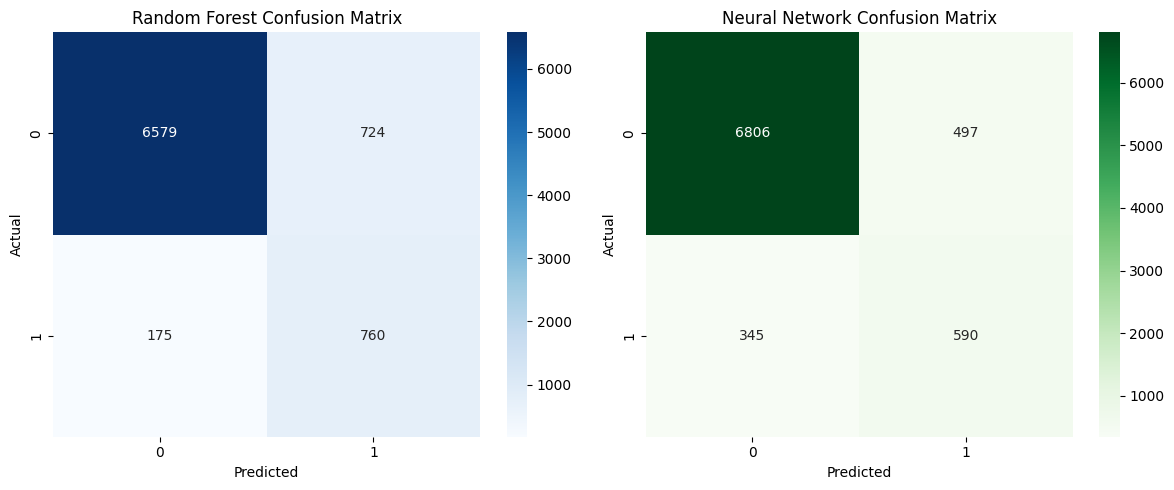

In [9]:
# Confusion Matrices
rf_cm = confusion_matrix(y_test, y_pred_rf)
nn_cm = confusion_matrix(y_test, y_pred_nn)

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.heatmap(rf_cm, annot=True, fmt='d', cmap='Blues')
plt.title("Random Forest Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")

plt.subplot(1, 2, 2)
sns.heatmap(nn_cm, annot=True, fmt='d', cmap='Greens')
plt.title("Neural Network Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")

plt.tight_layout()
plt.show()

258/258 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


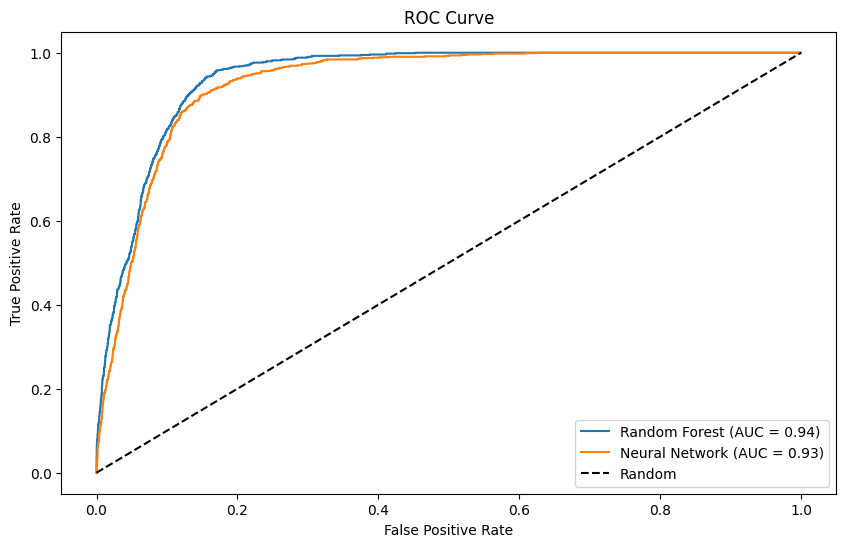

In [10]:
# Plot ROC Curves
rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_best_model.predict_proba(X_test)[:, 1])
nn_fpr, nn_tpr, _ = roc_curve(y_test, nn_model.predict(X_test))

plt.figure(figsize=(10, 6))
plt.plot(rf_fpr, rf_tpr, label=f"Random Forest (AUC = {roc_auc_rf:.2f})")
plt.plot(nn_fpr, nn_tpr, label=f"Neural Network (AUC = {roc_auc_nn:.2f})")
plt.plot([0, 1], [0, 1], 'k--', label="Random")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()